In [417]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns 
from matplotlib.colors import ListedColormap
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score 
from sklearn.metrics import mean_absolute_error, root_mean_squared_error,r2_score,precision_score,recall_score,f1_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier


In [418]:
#Part1: Data collection and Processing

In [419]:
#load the data csv to a pandas dataframe
data=pd.read_csv('heart_disease_uci.csv')
data 

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [420]:
#number of rows and columns in data
data.shape

(920, 16)

In [421]:
#check information of column, type of data in column, and number of rows that have non-null value
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [422]:
#check the null values
data.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [423]:
#statiscial measure about data
data.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [424]:
count= data['num'].value_counts()
print(count)

num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64


In [425]:
#plot

<Axes: title={'center': 'Heart Disease classification'}, xlabel='Type', ylabel='Count'>

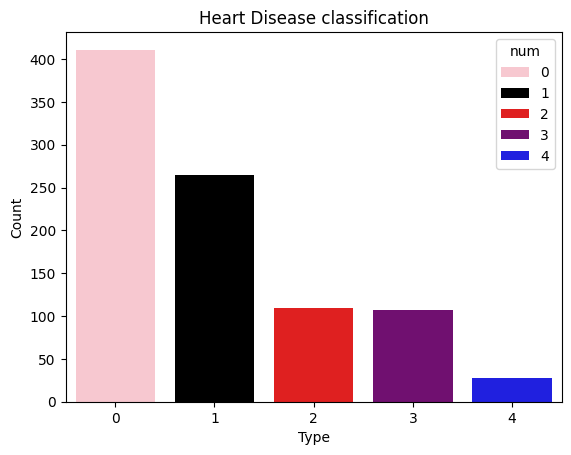

In [426]:
plt.title("Heart Disease classification")
colors=["pink","black","red","purple","blue"]
plt.xlabel("Type")
plt.ylabel("Count")
sns.countplot(x="num",data=data,hue="num",palette=colors)

In [427]:
#Part2: data cleaning and preprocessing

In [428]:
#missing values

Text(0.5, 1.0, 'Missing Values')

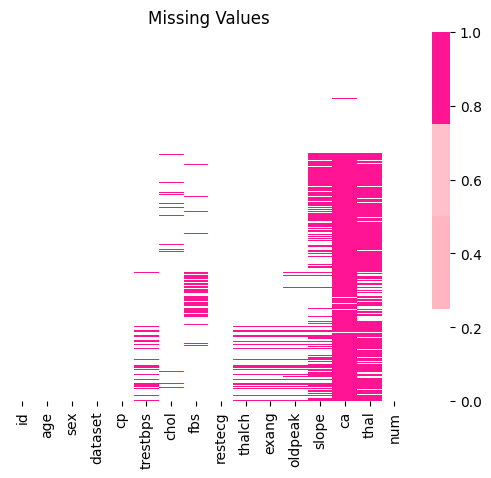

In [429]:
custom_cmap = ListedColormap(['white', 'lightpink', 'pink', 'deeppink'])
sns.heatmap(data.isnull(), yticklabels=False, cmap=custom_cmap,cbar=True)
plt.title('Missing Values')

In [430]:
round(((data.isnull().sum() / len(data)) * 100).sort_values(ascending=False),2)

ca          66.41
thal        52.83
slope       33.59
fbs          9.78
oldpeak      6.74
trestbps     6.41
exang        5.98
thalch       5.98
chol         3.26
restecg      0.22
cp           0.00
dataset      0.00
id           0.00
age          0.00
sex          0.00
num          0.00
dtype: float64

In [431]:
categorical_atrribute = ['thal', 'ca', 'slope', 'exang', 'restecg','fbs', 'cp', 'sex', 'num']
bool_attribute = ['fbs', 'exang']
numeric_attribute = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']

In [432]:
# define the function to impute the missing values in thal column

In [433]:
data.isnull().sum()[data.isnull().sum() > 0].sort_values(ascending=False)
missing_data_cols = data.isnull().sum()[data.isnull().sum() > 0].index.tolist()
missing_data_cols

['trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalch',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [434]:

def impute_categorical_missing_data(passed_col):
    data_null = data[data[passed_col].isnull()]
    data_not_null = data[data[passed_col].notnull()]

    X = data_not_null.drop(passed_col, axis=1)
    y = data_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    if passed_col in bool_attribute:
        y = label_encoder.fit_transform(y)
        
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)
    
    for col in X.columns:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_classifier = RandomForestClassifier()

    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)

    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")

    X = data_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
                
    if len(data_null) > 0: 
        data_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_attribute:
            data_null[passed_col] = data_null[passed_col].map({0: False, 1: True})

    data_combined = pd.concat([data_not_null, data_null])
    
    return data_combined[passed_col]


In [435]:

def impute_continuous_missing_data(passed_col):
    
    data_null = data[data[passed_col].isnull()]
    data_not_null = data[data[passed_col].notnull()]

    X = data_not_null.drop(passed_col, axis=1)
    y = data_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()
    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])
    
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)
    y_pred = rf_regressor.predict(X_test)

    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    print("RMSE =", root_mean_squared_error(y_test, y_pred), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

    X = data_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
             pass
                
    if len(data_null) > 0: 
        data_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    data_combined = pd.concat([data_not_null, data_null])
    
    return data_combined[passed_col]

In [436]:
# remove warning
import warnings
warnings.filterwarnings('ignore')

# impute missing values using our functions
for col in missing_data_cols:
    print("Missing Values", col, ":", str(round((data[col].isnull().sum() / len(data)) * 100, 2))+"%")
    if col in categorical_atrribute:
        data[col] = impute_categorical_missing_data(col)
    elif col in numeric_attribute:
        data[col] = impute_continuous_missing_data(col)
    else:
        pass

Missing Values trestbps : 6.41%
MAE = 13.16098265895954 

RMSE = 17.084421274629626 

R2 = 0.08866438888061245 

Missing Values chol : 3.26%
MAE = 45.4229213483146 

RMSE = 64.18075982302386 

R2 = 0.6736915245901123 

Missing Values fbs : 9.78%
The feature 'fbs' has been imputed with 80.12 accuracy

Missing Values restecg : 0.22%
The feature 'restecg' has been imputed with 64.13 accuracy

Missing Values thalch : 5.98%
MAE = 16.60861271676301 

RMSE = 21.537470413024543 

R2 = 0.3255050518138365 

Missing Values exang : 5.98%
The feature 'exang' has been imputed with 78.03 accuracy

Missing Values oldpeak : 6.74%
MAE = 0.5672790697674419 

RMSE = 0.7942745117401162 

R2 = 0.39896578142877903 

Missing Values slope : 33.59%
The feature 'slope' has been imputed with 68.29 accuracy

Missing Values ca : 66.41%
The feature 'ca' has been imputed with 64.52 accuracy

Missing Values thal : 52.83%
The feature 'thal' has been imputed with 71.26 accuracy



In [437]:
data.isnull().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [438]:
#Handle outliers

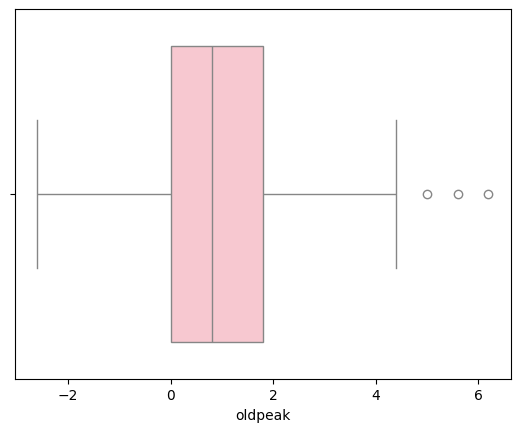

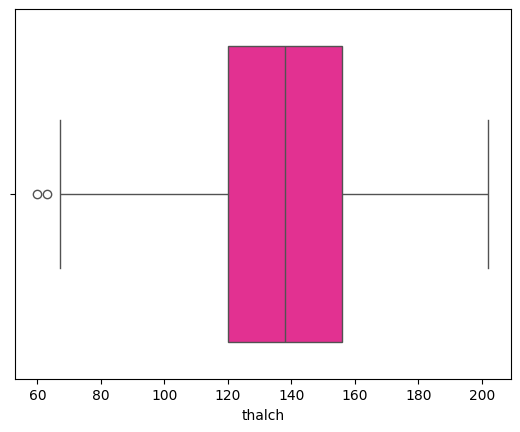

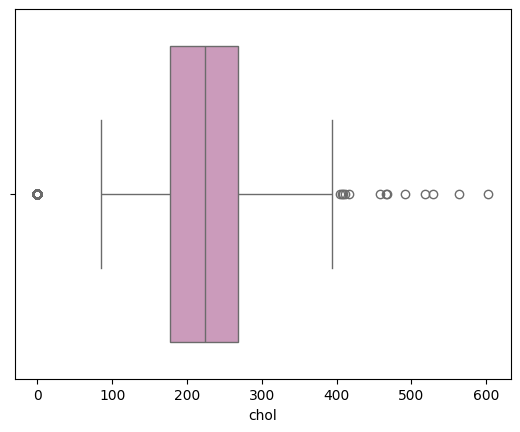

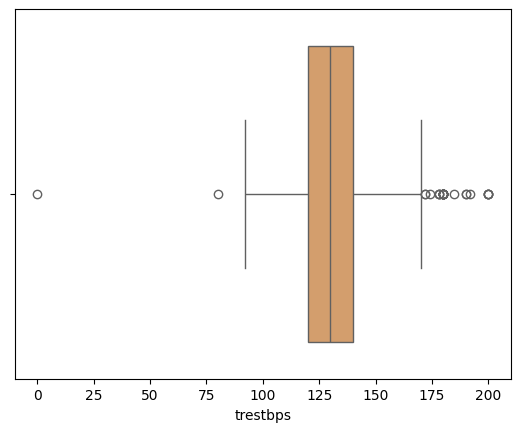

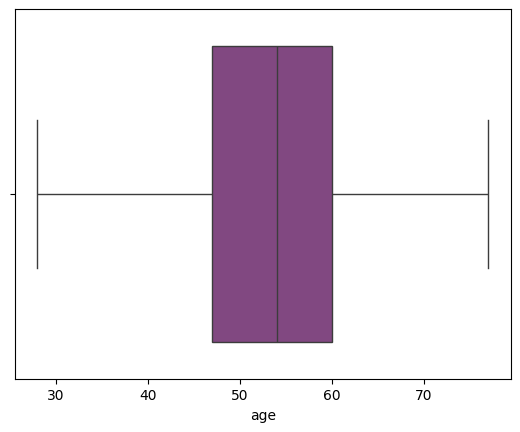

In [439]:
# create box plots for all numeric columns using for loop and subplot
sns.boxplot(x=data['oldpeak'],color="pink")
plt.show()
sns.boxplot(x=data['thalch'],color="deeppink")
plt.show()
sns.boxplot(x=data['chol'],color="#d393be")
plt.show()
sns.boxplot(x=data['trestbps'],color="#e49d5c")
plt.show()
sns.boxplot(x=data['age'],color="#8b3e8b")
plt.show()

In [440]:
#ML: Decision tree

In [441]:
#train test split
X = data.drop('num', axis=1)
y = data['num']
le = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype == 'category':
        X[col] = le.fit_transform(X[col])


# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=42)

# train the decision tree model
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)

# predict the test data
y_pred = dt.predict(X_test)

print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test, y_pred, average='micro'))
print('Recall score: ', recall_score(y_test, y_pred, average='micro'))
print('F1 score: ', f1_score(y_test, y_pred, average='micro'))

Accuracy score:  0.6413043478260869
Precision score:  0.6413043478260869
Recall score:  0.6413043478260869
F1 score:  0.6413043478260869


In [442]:
input = (1, 63, "Male", "Cleveland", "typical angina", 145, 233, True, "lv hypertrophy", 150, False, 2.3, "downsloping", 0, "fixed defect")
#change the input data -> numpy array
input_np= np.asarray(input)
#
input_data=pd.DataFrame([input_np],columns=X.columns)
#enconde input array
for col in input_data.columns:
    if input_data[col].dtype == 'object' or input_data[col].dtype == 'category':
        input_data[col] = le.fit_transform(input_data[col])

#reshaped 
input_data_reshaped = input_data.values.reshape(1, -1)
#predict
predict2=dt.predict(input_data_reshaped)
if predict2[0]==0:
    print('The patient does not have heart disease')
elif predict2[0]==1:
    print('The patient has mild heart disease')
elif predict2[0]==2:
    print('The patient has moderate heart disease')
elif predict2[0]==3:
    print('The patient has severe heart disease')
else:
    print('The patient very severe or chronic heart disease')

The patient has moderate heart disease


In [443]:
#ML:Linear Regression

In [444]:
lr=LogisticRegression(random_state=42)
lr.fit(X_train,y_train)
y_pred2 = lr.predict(X_test)

print('Accuracy score: ', accuracy_score(y_test, y_pred2))
print('Precision score: ', precision_score(y_test, y_pred2, average='micro'))
print('Recall score: ', recall_score(y_test, y_pred2, average='micro'))
print('F1 score: ', f1_score(y_test, y_pred2, average='micro'))

Accuracy score:  0.4945652173913043
Precision score:  0.4945652173913043
Recall score:  0.4945652173913043
F1 score:  0.4945652173913043


In [445]:
#Random forest

In [446]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# predict the test data
y_pred3 = rf.predict(X_test)

print('Accuracy score: ', accuracy_score(y_test, y_pred3))
print('Precision score: ', precision_score(y_test, y_pred3, average='micro'))
print('Recall score: ', recall_score(y_test, y_pred3, average='micro'))
print('F1 score: ', f1_score(y_test, y_pred3, average='micro'))

Accuracy score:  0.6413043478260869
Precision score:  0.6413043478260869
Recall score:  0.6413043478260869
F1 score:  0.6413043478260869


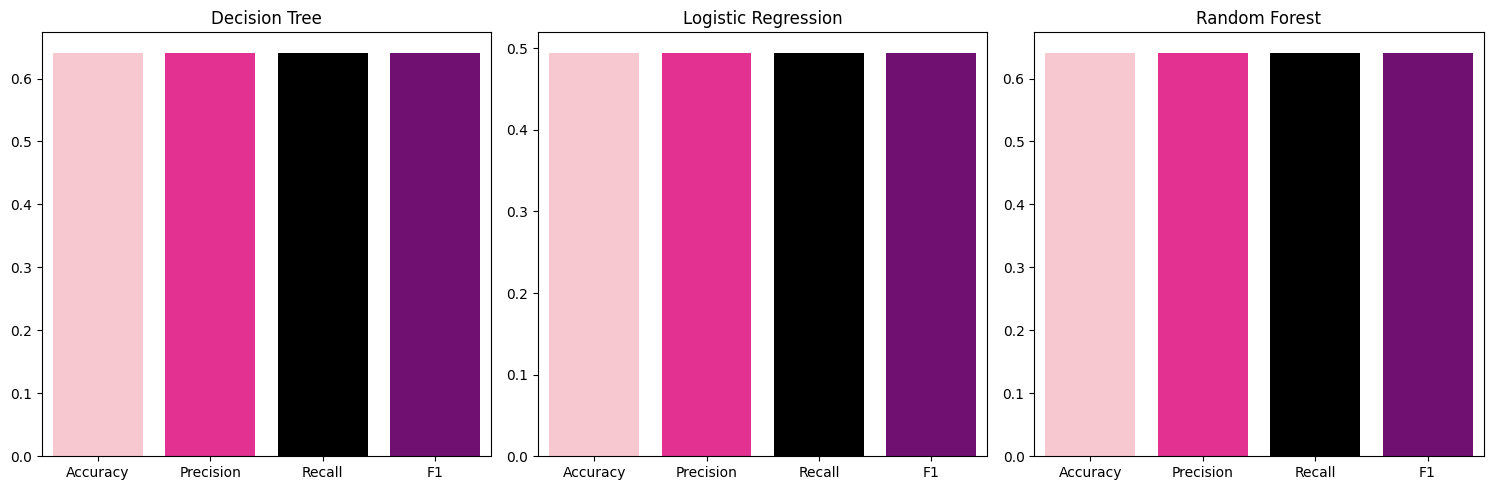

In [447]:




# Màu sắc cho các cột
colors = ['pink', 'deeppink', 'black', 'purple']  # Xanh dương, cam, xanh lá, đỏ

plt.figure(figsize=(20, 5))

# Biểu đồ con thứ nhất - Decision Tree
plt.subplot(1, 4, 1)
sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1'], 
            y=[accuracy_score(y_test, y_pred), 
               precision_score(y_test, y_pred, average='micro'), 
               recall_score(y_test, y_pred, average='micro'), 
               f1_score(y_test, y_pred, average='micro')],
            palette=colors)
plt.title('Decision Tree')

# Biểu đồ con thứ hai - Logistic Regression
plt.subplot(1, 4, 2)
sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1'], 
            y=[accuracy_score(y_test, y_pred2), 
               precision_score(y_test, y_pred2, average='micro'), 
               recall_score(y_test, y_pred2, average='micro'), 
               f1_score(y_test, y_pred2, average='micro')],
            palette=colors)
plt.title('Logistic Regression')

# Biểu đồ con thứ ba - Random Forest
plt.subplot(1, 4, 3)
sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1'], 
            y=[accuracy_score(y_test, y_pred3), 
               precision_score(y_test, y_pred3, average='micro'), 
               recall_score(y_test, y_pred3, average='micro'), 
               f1_score(y_test, y_pred3, average='micro')],
            palette=colors)
plt.title('Random Forest')

# Điều chỉnh bố cục để tránh trùng lặp các thành phần
plt.tight_layout()
plt.show()
